In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
X_train.dtype,X_test.dtype,y_train.dtype,y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [ ]:
X_valid,X_train=X_train[:4000],X_train[4000:]/255
y_valid,y_train=y_train[:4000],y_train[4000:]
X_test=X_test/255

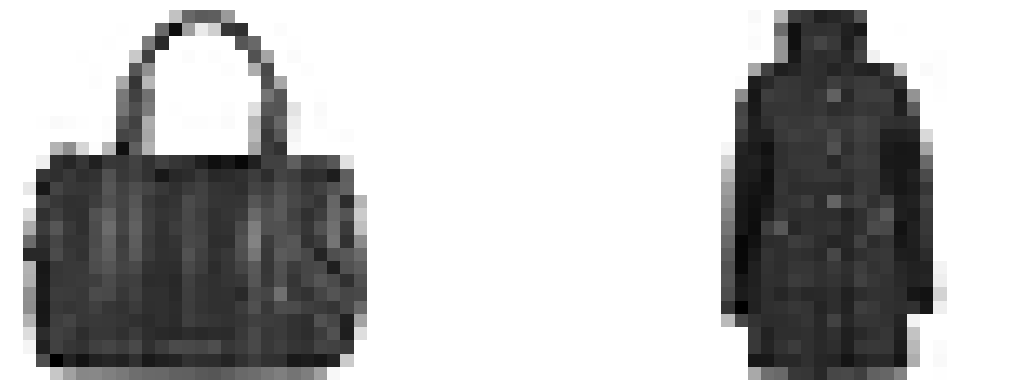

In [ ]:
plt.figure(figsize=(15,4))
plotnumber=1
for i in range(2):
  if plotnumber<=2:
    ax=plt.subplot(1,2,plotnumber)
    plt.imshow(X_train[i],cmap='binary')
    plt.axis('off')
  plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[0]],class_names[y_train[1]]

('Bag', 'Coat')

In [ ]:
X_valid.shape

(4000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

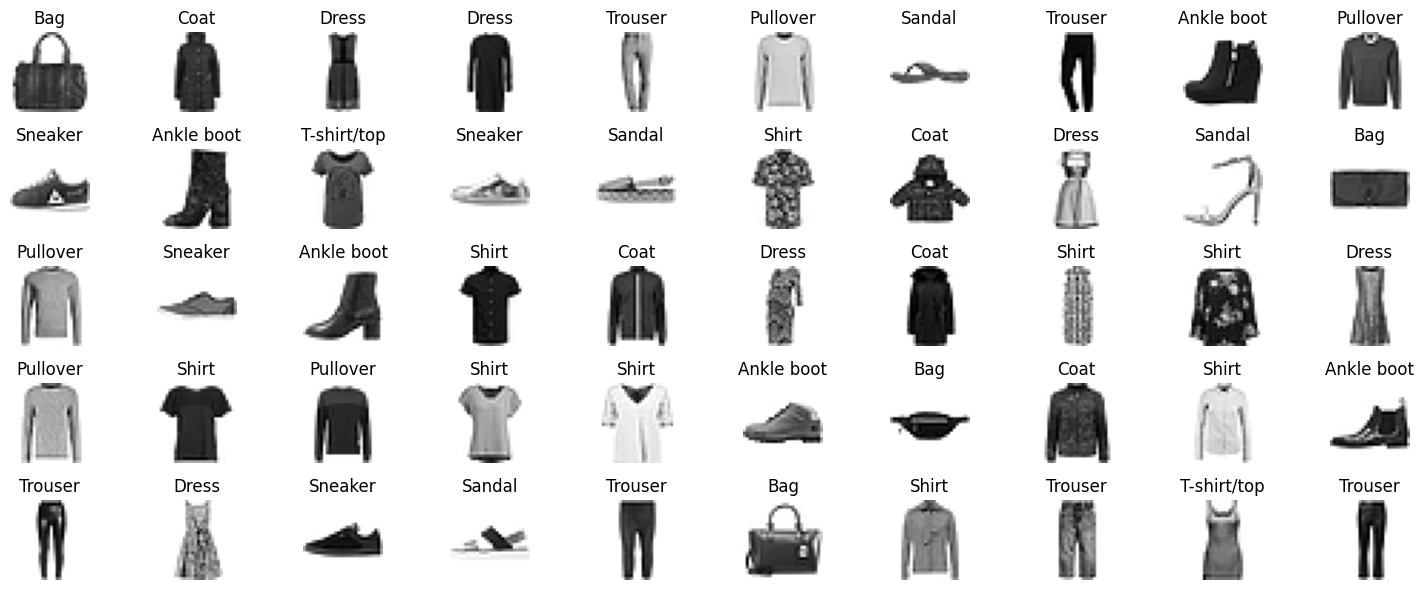

In [ ]:
plt.figure(figsize=(15,6))
plotnumber=1
for i in range(51):
  if plotnumber <= 50:
    ax=plt.subplot(5,10,plotnumber)
    plt.imshow(X_train[i],cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_train[i]],fontdict={'fontsize':12,'color':'black'})
  plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(70,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 90,350
Trainable params: 90,350
Non-traina

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
1750/1750 [==============================] - 11s 6ms/step - loss: 0.5288 - accuracy: 0.8108 - val_loss: 64.3685 - val_accuracy: 0.8328
Epoch 2/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3792 - accuracy: 0.8625 - val_loss: 51.5046 - val_accuracy: 0.8468
Epoch 3/50
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3428 - accuracy: 0.8736 - val_loss: 58.3222 - val_accuracy: 0.8407
Epoch 4/50
1750/1750 [==============================] - 9s 5ms/step - loss: 0.3218 - accuracy: 0.8806 - val_loss: 73.6915 - val_accuracy: 0.8235
Epoch 5/50
1750/1750 [==============================] - 8s 5ms/step - loss: 0.3084 - accuracy: 0.8856 - val_loss: 36.9028 - val_accuracy: 0.8733
Epoch 6/50
1750/1750 [==============================] - 8s 5ms/step - loss: 0.2904 - accuracy: 0.8912 - val_loss: 52.3708 - val_accuracy: 0.8505
Epoch 7/50
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2815 - accuracy: 0.8952 - val_loss: 53.9530 - val_a

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.8877


[0.4908628761768341, 0.8877000212669373]

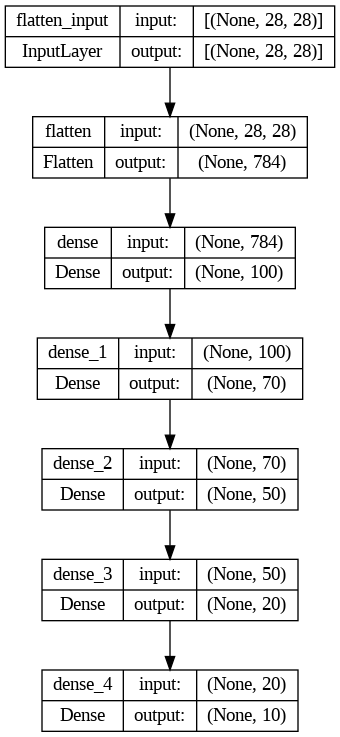

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

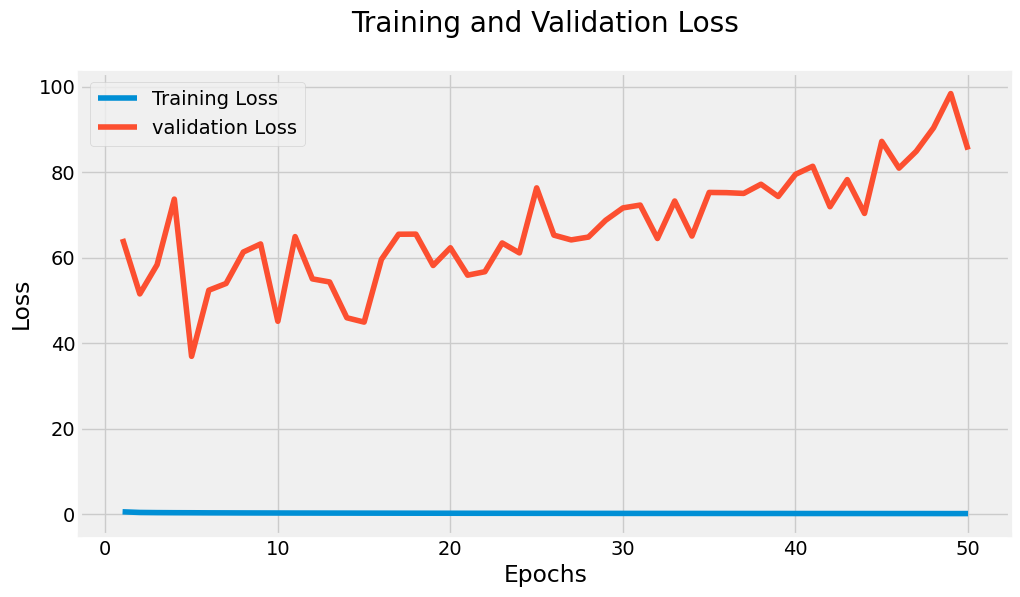

In [ ]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
epoch=range(1,51)
sns.lineplot(x=epoch,y=train_loss,label='Training Loss')
sns.lineplot(x=epoch,y=val_loss,label='validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

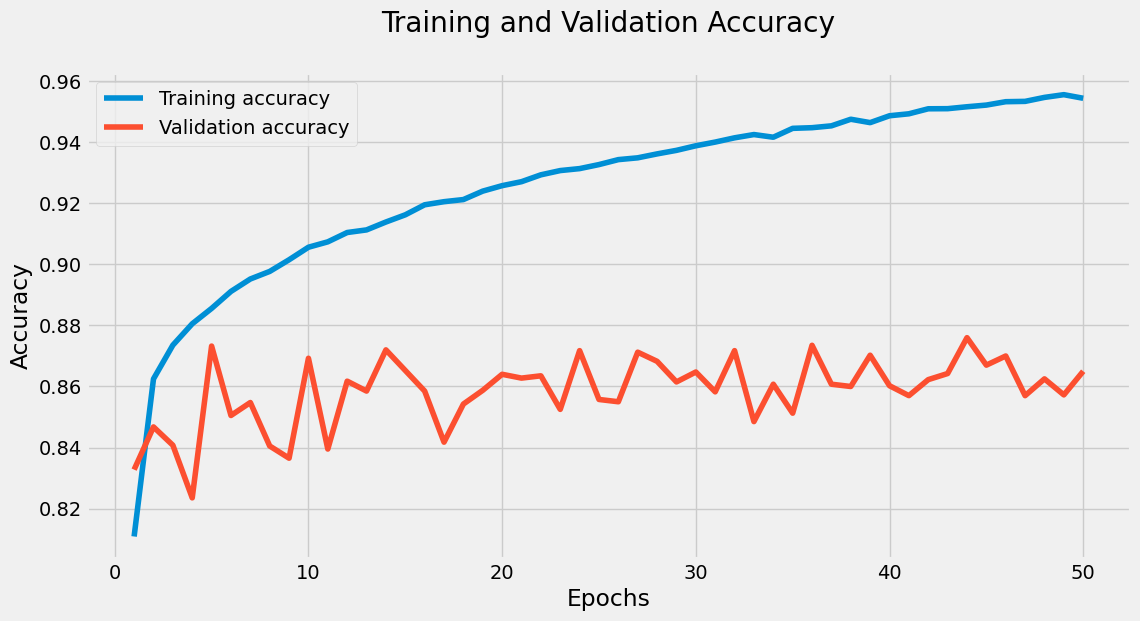

In [ ]:
plt.figure(figsize=(12,6))
train_loss=model_history.history['accuracy']
val_loss=model_history.history['val_accuracy']
epoch=range(1,51)
sns.lineplot(x=epoch,y=train_loss,label='Training accuracy')
sns.lineplot(x=epoch,y=val_loss,label='Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
y_probs=model.predict(X_test)
y_preds=y_probs.argmax(axis=1)
y_preds[:100]

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 6, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 6, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2])

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes=cm.shape[0]
  fig,ax=plt.subplots(figsize=figsize)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  threshold=(cm.max() + cm.min()) / 2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=text_size)

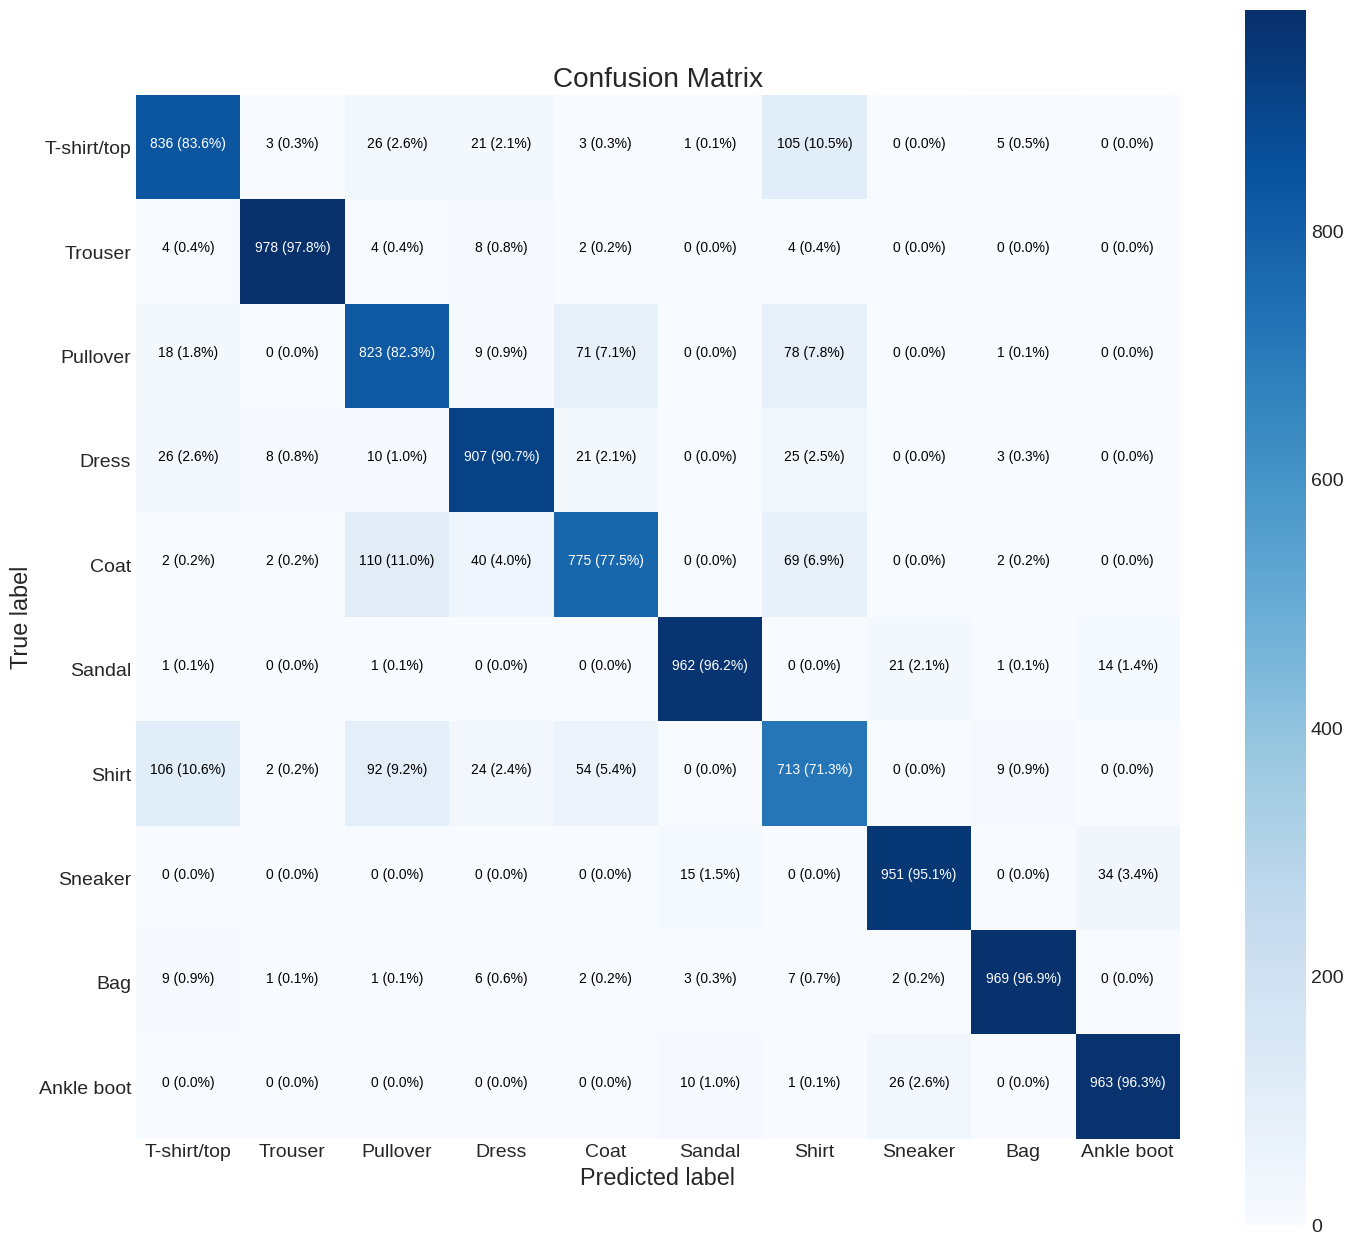

In [ ]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  i=random.randint(0,len(images))
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]
  plt.imshow(target_image,cmap=plt.cm.binary)
  if pred_label==true_label:
    color="green"
  else:
    color="red"
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 22ms/step


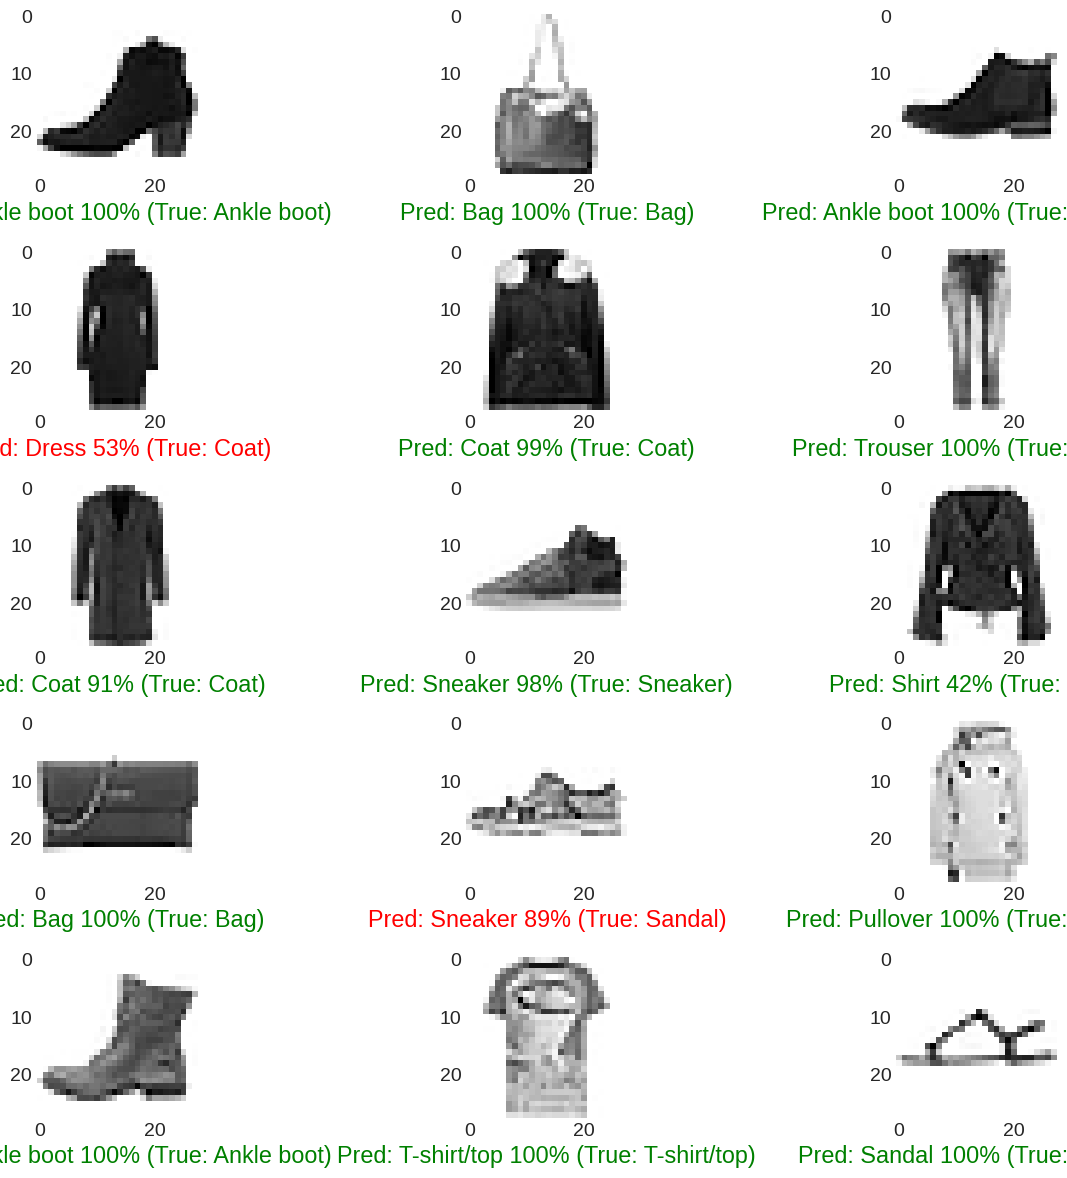

In [ ]:
plt.figure(figsize=(15,12))
plotnumber=1
for i in range(15):
  if plotnumber <= 15:
    ax=plt.subplot(5,3,plotnumber)
    plot_random_image(model=model,
                      images=X_test,
                      true_labels=y_test,
                      classes=class_names)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
X_new=X_test[:5]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_pred_probs=model.predict(X_new)
y_pred = np.argmax(y_pred_probs, axis=1)

1/1 [==============================] - 0s 49ms/step


In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

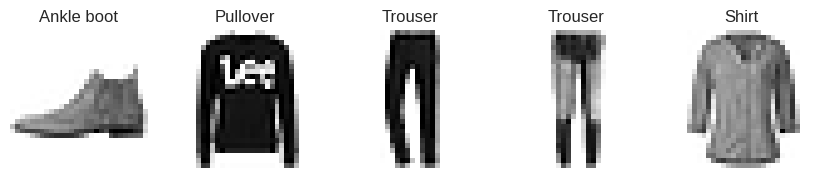

In [ ]:
y_new=y_test[:5]
plt.figure(figsize=(9.2,4.4))
for index, image in enumerate(X_new):
  plt.subplot(1,5,index+1)
  plt.imshow(image,cmap="binary",interpolation="nearest")
  plt.axis('off')
  plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()